Project Title :Recommendations for writing good job descriptions

The data comes from an old competition posted by City of Los Angeles on Kaggle. City of LA wants to improve the job bulletins that will fill all the open positions. The data consists of job postings in unstrucured text format.This project is focused on analyzing the current job postings using NLP and Text mining to gather valuable insights.

__Problem Statement__ : To analyze existing job postings and suggest improvements to attract applicant pool that can help City of LA fill in all the open positions.

__Analysis__: The analysis is carried out in two parts:

* __Part 1__: Converting a folder full of plain text files in the dataframe format.
* __Part 2__: Analyzing the job postings to gather insights and provide recommendations. The job postings are evaluated on three different aspects:
    * a. Content - Readability, Similarity
    * b. Format - Completeness, Word count, spell check, complexity of selection process
    * c. Tone - Parts of Speech Tagging, Sentiment Analysis

After completing the analysis, a cumulative score for each job posting has been computed based on the above three criteria. This cumulative score can be used to rate the postings as good or bad (need improvement).

- __Data Source__: https://www.kaggle.com/c/data-science-for-good-city-of-los-angeles/data 
- __Libraries__: NLTK is the key library here. It has huge range of functions that help extract meaning from the unstructured text data

__Part 1__: 

Converting text data into dataframe that consists of separate sections in the job postings including posting date, annual salary, requirements, application process, selection procedure etc. 

In [100]:
#Necessary Imports:
%pylab inline
import pandas as pd
import numpy as np
import re
import os
from textstat.textstat import textstatistics
import textstat

#NLP and Text Mining:
import nltk
from readability import Readability
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from spellchecker import SpellChecker
from nltk import word_tokenize
from nltk import sent_tokenize

#plot:
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
#path = os.path.join(settings.Data_DIR,"Job Bulletins")
#bulletins=os.listdir(path)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dakshatajain/Desktop/SCU/Sping/Assignments/Project/Job Bulletins/'

In [2]:
bulletins = os.listdir("/Users/dakshatajain/Downloads/ML_Project_Recommendations for good job description-2/Job Bulletins")

In [81]:
path = "/Users/dakshatajain/Downloads/ML_Project_Recommendations for good job description-2/Job Bulletins/"

Converting to Dataframe:

Based on initial analysis and eyeballing, an exhaustive list of titles is created which is further used to identify and create separate sections from a job posting. The following function reads each file in the job bulletins folder, assigns values pertaining to the title to each of the title in the list created and stores it in a dictionary. This dictionary is further used to create the dataframe.

In [82]:
#Define function to create a dictionary for each file.
def createdict(lines):
    canonical_equal = 'AN EQUAL EMPLOYEMENT OPPORTUNITY EMPLOYER'
    title_renames = dict()
    for k in ['REQUIREMENT/ MINIMUM QUALIFICATION',
              'REQUIREMENT',
              'REQUIREMENT/ MINIMUM QUALIFICATION',
              'REQUIREMENT/MIMINUMUM QUALIFICATION',
              'REQUIREMENT/MINIMUM QUALIFICAITON',
              'REQUIREMENT/MINIMUM QUALIFICATION',
              'REQUIREMENT/MINIMUM QUALIFICATIONS',
              'REQUIREMENT/MINUMUM QUALIFICATION',
              'REQUIREMENTS',
              'REQUIREMENTS/ MINIMUM QUALIFICATIONS',
              'REQUIREMENTS/MINIMUM QUALIFCATIONS',
              'REQUIREMENTS/MINIMUM QUALIFICATIONS',
              'REQUIREMENTS/MINIMUM REQUIREMENTS',
              'REQUIREMENTS/MINUMUM QUALIFICATIONS']:
        title_renames[k] = 'REQUIREMENTS'
    for k in ['AN EQUAL EMPLOMENT OPPORTUNITY EMPLOYER',
              'AN EQUAL EMPLOYEMENT OPPORTUNITY EMLOYER',
              'AN EQUAL EMPLOYEMENT OPPORTUNITY EMPLOYER',
              'AN EQUAL EMPLOYMENT OPPORTUINTY EMPLOYER',
              'AN EQUAL EMPLOYMENT OPPORTUNITY',
              'AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYEE',
              'AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER',
              'AN EQUAL EMPLOYMENT OPPORTUNITY EMPOYER',
              'AN EQUAL EMPLOYMENT OPPORUNITY EMPLOYER',
              'AN EQUAL EMPLOYMENT OPPPORTUNITY EMPLOYER',
              'AN EQUAL EMPLOYMENT OPPROTUNITY EMPLOYER',
              'AN EQUAL OPPORTUNITY EMPLOYER']:
        title_renames[k] = 'AN EQUAL EMPLOYEMENT OPPORTUNITY EMPLOYER'
    for k in ['ANNUALSALARY','ANNUAL SALARY']:
        title_renames[k] = 'ANNUAL SALARY'   
    for k in ['SELECTION PROCEDURE','SELELCTION PROCESS','SELECTION PROCESS']:
        title_renames[k]='SELECTION PROCEDURE'
    for k in ['QUALICATIONS REVIEW', 'QUALIFICATIONS REVIEW']:
        title_renames[k]='QUALIFICATIONS REVIEW'
    for k in ['PROCESS NOTE','PROCESS NOTES']:
        title_renames[k]='PROCESS NOTES'
    for k in ['DUTIES', 'DUTIES AND RESPONSIBILITIES']:
        title_renames[k]='DUTIES'
    
    # Skip empty lines in the beginning.
    idx = 0
    while len(lines[idx].rstrip(' \n\r\t')) == 0:
        idx = idx + 1
    d = {}
    d['TITLE'] = lines[idx].rstrip('\r\n\t')
    curr_title = ''
    for l in lines[idx+1:]:
        if 'Open Date' in l:
            curr_title='OPEN DATE'
            d[curr_title]=[]
            d[curr_title].append(l.rstrip(' \n\t').split(':')[1])
            
        elif re.search('^[A-Z][A-Z /]+$', l):
            l = l.rstrip('\n\t ')
            curr_title = l
            if curr_title in title_renames:
                curr_title = title_renames[curr_title]
            if curr_title not in d:
                d[curr_title] = []
        elif curr_title != '':
            d[curr_title].append(l.strip(' \n\t'))
    return d   

#Define function to create dictionary for each files.
def createlistofdict(path):
    dicts = []
    for f in os.listdir(path):
        file = open(path + '/' + f,'r',encoding ='latin-1')
        d = createdict(file.readlines()) #Call createdict function inside
        dicts.append(d)
    return dicts

In [83]:
#Define dataframe from dictionary
df = pd.DataFrame(createlistofdict(path)) 

# Extracting required columns:
df = df[['TITLE','ANNUAL SALARY','OPEN DATE','APPLICATION DEADLINE','REQUIREMENTS', 'APPLICATION PROCESS','DUTIES','HOW TO APPLY'
       ,'PROCESS NOTES', 'QUALIFICATIONS REVIEW',
       'SELECTION PROCEDURE',
       'WHERE TO APPLY','ADDITIONAL JOB INFORMATION']]

In [84]:
# Merging similar columns:
def clean_merge(df,*col_list,merged):
    df[merged] = ""
    for c in col_list:
        for row in df.loc[df[c].isna(),c].index:
            df.at[row,c] = []
        df[merged] = df[merged].map(str) + df[c].map(str) 

In [85]:
clean_merge(df,'REQUIREMENTS', 'PROCESS NOTES','DUTIES',merged = 'REQ_MERGED')
clean_merge(df,'APPLICATION PROCESS', 'WHERE TO APPLY','HOW TO APPLY',merged = 'APPLIC_MERGED')
df.head(2)

,TITLE,ANNUAL SALARY,OPEN DATE,APPLICATION DEADLINE,REQUIREMENTS,APPLICATION PROCESS,DUTIES,HOW TO APPLY,PROCESS NOTES,QUALIFICATIONS REVIEW,SELECTION PROCEDURE,WHERE TO APPLY,ADDITIONAL JOB INFORMATION,REQ_MERGED,APPLIC_MERGED
0,SENIOR HOUSING INSPECTOR,"[, $90,410 to $109,306, , NOTE:, , 1. Annual s...","[ 04-27-18, (Exam Open to Current City Employ...","[, Applications must be received by THURSDAY, ...","[, Two years of full-time paid experience with...",[],"[, A Senior Housing Inspector supervises emplo...",[],"[, 1. Applicants who lack six months or less o...",NaN,"[, Examination Weight: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....",NaN,"['', 'Two years of full-time paid experience w...","[]['', 'Applications will only be accepted on-..."
1,LEGISLATIVE ASSISTANT,"[, $76,379 to $111,624 and $82,476 to $120,582...","[ 09-18-15, (Exam Open to Current City Employ...","[, Applications must be received by THURSDAY, ...","[, One year of full-time paid experience in a ...",[],"[, A Legislative Assistant serves one or more ...",[],[],NaN,"[, Examination Weights: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....",NaN,"['', 'One year of full-time paid experience in...","[]['', 'Applications will only be accepted on-..."


In [86]:
df.shape

(684, 15)

The above dataframe consists of 684 rows i.e. 684 job postings and 15 columns which represent different sections in a job posting.
Since we are focused on text data and not prediction, we will move ahead without further cleaning of numerical columns like annual salary, date etc. 

__Part 2:__ 

* a. Format: Format is one of the most important part in job postings.It can be evaluated based on following criterias:
    * i. Completeness: Whether the job postings includes all necessary sections like annual salary, experience years required, qualifications review, selection procedure etc. 
    * ii. Complexity of selection process and word count: A [study] suggests that lengthy job postings and complex selection process might negatively impact the attention span/interest of the candidate. 
    * iii. Spell Check : In general spelling mistakes would make reading unpleasant in any situation.
    
[study]: https://power.atsondemand.com/is-attention-span-killing-your-candidate-flow/

* __Format__:

___Completeness:___ As mentioned earlier, we will check if important sections are included in the postings or not and accordingly an indicator is created for each of the mentioned sections.

__1. Experience Years mentioned in requirements or not?__

In [87]:
#Function to check if a section is present or not and also create a frequency plot of the output:

def present_not(df,col, pattern1,new_col,indicator=False,show=True):
    temp = []
    if indicator == False:
        for index, row in df.iterrows():
            a = ''.join(row[col]).lower()
            if(re.search(pattern1,a)):
                b = re.search(pattern1,a).group()
                temp.append(1)
            else:
                temp.append(0)
    else:
        temp = (~df[col].isna()) * 1 
        
    df[new_col] = temp
    
    if show == True:
        sns.catplot(data=df,x=new_col,kind = 'count')

In [88]:
#Creating pattern for experience years:
pattern1 = re.compile(r'(one|two|three|four|five|six|seven|eigth|nine|ten)(\s-?)(years?)\s(of\sfull-time) | \
(one|two|three|four|five|six|seven|eigth|nine|ten)(\s-?)(months?)\s(of\sfull-time)')

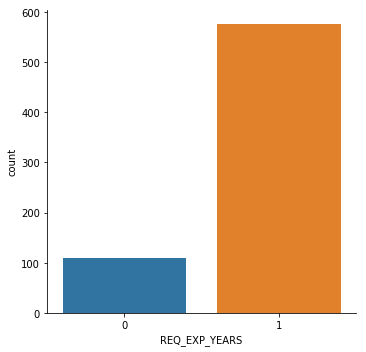

In [89]:
#Applying function to create a new column:
present_not(df,'REQUIREMENTS', pattern1,'REQ_EXP_YEARS')

 __Observation__: Based on the above plot,it can be observed that 14% of the descriptions do not have number of experience years specified

__2. Annual Salary Present or not?__

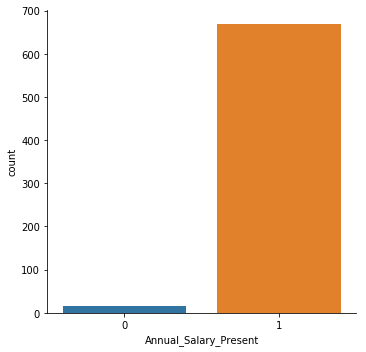

In [90]:
present_not(df,'ANNUAL SALARY', pattern,'Annual_Salary_Present',indicator = True )

__Observation__: 2% of the descriptions do not have annual salary specified

__4. Full Time / Part Time present or not ?__

In [91]:
pattern1 = re.compile(r'full(-?)[ *]time')
pattern2 = re.compile(r'part(-?)[ *]time')

In [92]:
def full_part(df,col,pattern1,pattern2,new_col,show=True):
    full=[]
    for index, row in df.iterrows():
        a = ''.join(row[col]).lower()
        if(re.search(pattern1,a)):
            full.append(1)
        elif ((re.search(pattern2,a))):
            full.append(1)
        else:
            full.append(0)
    df[new_col] = full

    if show == True:
        sns.catplot(data=df,x=new_col,kind = 'count')

0    671
1     13
Name: FULL/PART, dtype: int64

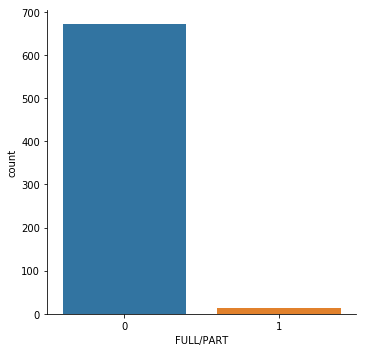

In [95]:
full_part(df,'REQUIREMENTS',pattern1,pattern2,'FULL/PART')
df['FULL/PART'].value_counts()

__Observation__: Only around 2% of the descriptions have Full/Part Time information present. This is really low and it indicates incomplete information and might result in ambiguity and/or attract incorrect pool of candidates

__5. School Type and School present or not ?__

In [112]:
def education_level(ls):
    Temp = []
    ls = str(ls)
    if  re.search(r'(college or university)\s',ls):
        r = re.search(r'(college or university)\s',ls).group()
        Temp.append(r)

    if  re.search(r'(high school)\s',ls):
        s = re.search(r'(high school)\s',ls).group()
        Temp.append(s)

    if  re.search(r'(apprenticeship)\s',ls):
        m = re.search(r'(apprenticeship)\s',ls).group()
        Temp.append(m) 

    return Temp

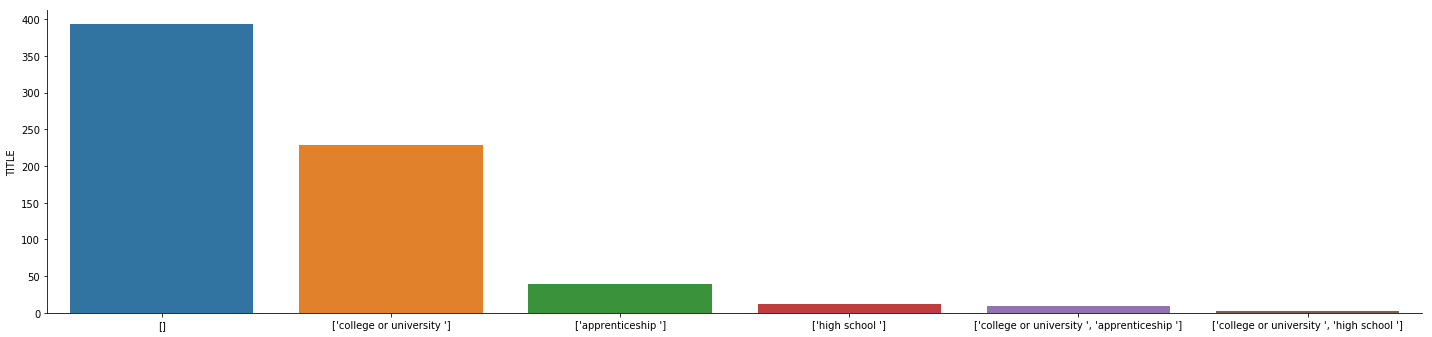

In [113]:
df['SCHOOL_TYPE']  = df['REQ_MERGED'].apply(lambda x: education_level(x))
df['SCHOOL_TYPE'] = df['SCHOOL_TYPE'].map(str)
result = df.groupby(["SCHOOL_TYPE"])['TITLE'].aggregate('count').reset_index().sort_values('TITLE',ascending=False)
ax=sns.catplot(data=result,x="SCHOOL_TYPE",y='TITLE',aspect=4,kind='bar')
ax.set(xlabel='')
plt.show()

In [114]:
df['SCHOOL_PRESENT']=(df['SCHOOL_TYPE']!='')*0

___Complexity of Selection Process:___ Based on how number of rounds listed in the selection process, we define complexity as more the number of rounds higher is the complexity. The following function rates the complexity on a scale of 1-4 with 1 being least complex.

In [96]:
def complexity(df,col,new_col,show=True):
    temp = []
    for i in range(len(df)): 
        try:
            record_list = []
            for j in df[col][i]:
                value = [z[0] for z in re.findall('([A-Z][a-z]+)((\s\.\s)+)',j)]
                if value != []:
                    record_list.append(value)
            temp.append(len(record_list))
        except:
            temp.append(float(nan))
        
    df[new_col] = temp

    if show == True:
        sns.catplot(data=df,x=new_col,kind = 'count')

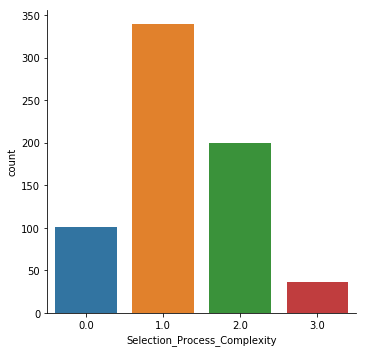

In [97]:
complexity(df,'SELECTION PROCEDURE','Selection_Process_Complexity',True)

__Observation__: It can be observed that most of the applications are usually with lower complexity

___WordCount:___ Based on a study, a job description should have no more than ~600-700 words for better readibility. In this section, we evaluate the total number of words in a posting, average sentence length and proportion of important sections like requirement and duties in the entire posting

In [98]:
#Define function to calculate total number of words, sentences and average length per sentence for each document
def word_count(bulletins,path):
    s={}
    for i in range(len(bulletins)):
        with open(path+bulletins[i],encoding="ISO-8859-1") as f:
            idx = 0
            lines = f.readlines()
            while len(lines[idx].rstrip(' \n\r\t')) == 0:
                    idx = idx + 1
            key = lines[idx].rstrip('\r\n\t')
            
        with open(path +'/'+bulletins[i],encoding="ISO-8859-1") as f:
            a = f.read()
            phrases = sent_tokenize(a)
            sum_sent_length = 0
            for p in phrases:
                countwords = nltk.word_tokenize(p)
                words_in_sentence = len(countwords)
                sum_sent_length = sum_sent_length + words_in_sentence
        Numberofsentences = len(phrases)
        s[key]= [Numberofsentences,(sum_sent_length/Numberofsentences),sum_sent_length]
    return s

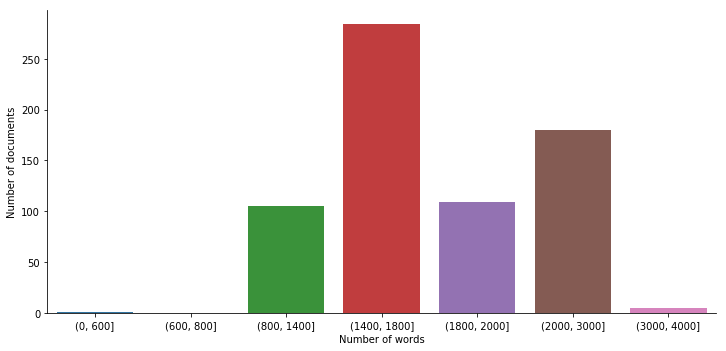

In [103]:
#Create dataframe from the word and sentence count dictionary
df_doc_counts = pd.DataFrame.from_dict(word_count(bulletins,path),orient='index').reset_index()
df_doc_counts.columns  = ["TITLE","SENTENCE_COUNT", "AVG_SENT_LENGTH","WORD_COUNT"]

df_doc_counts['WORD_COUNT_bin'] = pd.cut(df_doc_counts['WORD_COUNT'],bins=[0, 600, 800, 1400, 1800, 2000, 3000, 4000])
fig = sns.catplot(data=df_doc_counts,x="WORD_COUNT_bin",kind="count",aspect=2)
fig.set(xlabel='Number of words', ylabel='Number of documents')
plt.show()

df['DocWordCountLabel'] = df_doc_counts['WORD_COUNT'].apply(lambda x: 0 if x > 700 else 1)
df_doc_counts.drop(columns = ['WORD_COUNT_bin'],inplace = True)

Sectionwise word count : Requirements, application process, selection procedure

In [104]:
def countwords_sections(ls):
    ls_cleaned = re.sub('[^a-zA-Z \n\.]','',str(ls))
    words = ls_cleaned.split()
    return len(words)

def count(func,*cols):
    for c in cols:
        newcol = c+'_WORDCOUNT'
        df[newcol] = df[c].apply(lambda x: countwords_sections(x))
        
count(countwords_sections,'REQ_MERGED','APPLIC_MERGED','SELECTION PROCEDURE')

Proportion of job posting that consists of requirements and duties:

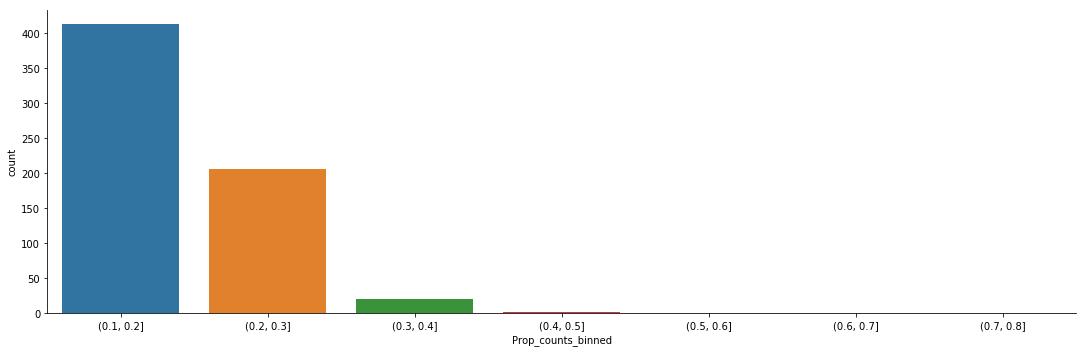

In [106]:
df_merged = pd.merge(df,df_doc_counts,on = "TITLE", how= 'left')
df_merged['Prop_counts'] = (df_merged['REQ_MERGED_WORDCOUNT'] / df_merged['WORD_COUNT'])

df_merged_1=df_merged.copy()
df_merged_1['Prop_counts_binned'] = pd.cut(df_merged_1['Prop_counts'],bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
sns.catplot(data=df_merged_1,x="Prop_counts_binned",kind="count",aspect=3)

df_merged['Prop_counts_labels'] = (df_merged['Prop_counts'] > 0.25) * 1

__Observations__:

1. The word count of job descriptions ranged from 800 – 4000 words.
2. None of the job descriptions met the ideal number of words (~600-700) for better readability.
3. The average proportion of word count of requirements and duties was only 18%. The threshold for classifying JDs has been set to 25% since these are the most important sections.

___SpellCheck:___ As mentioned previously, it is imperative to avoid any spelling mistakes in the postings. SpellChecker library has been used to identify the misspelled words and compute the total number of misspelled words in a posting.

In [107]:
def spellcheck(df,col,char,ignore):
    spell = SpellChecker()
    wordlist = ['cannot','http','https','fulfills','analyzes','recapitalization','citywide','analytics']
    spell.word_frequency.load_words(wordlist)

    misspelled = []
    for index, row in df.iterrows():
        text1 = row[col].strip(', ')
        for c in char:
            text1 = text1.replace(c,' ')
        text1 = text1.split()

        n = []
        misspelled.append(spell.unknown(text1))
        for d in misspelled:
            if d != -1 and d not in ignore:
                n.append(len(d))
            else:
                n.append(0)
    return n 

In [108]:
char = [ ']','%','@','[','\"','/', '#',',','.', '-', ':', ';','\'', '\"','(', ')','\\t','\\' ]
ignore = ['PeopleTools','Javascript','JQuery','Websphere','Versata','ASP.Net','ColdFusion','C/C++','UDB']
df['Req_merged_Spell'] = spellcheck(df,'REQ_MERGED',char,ignore)

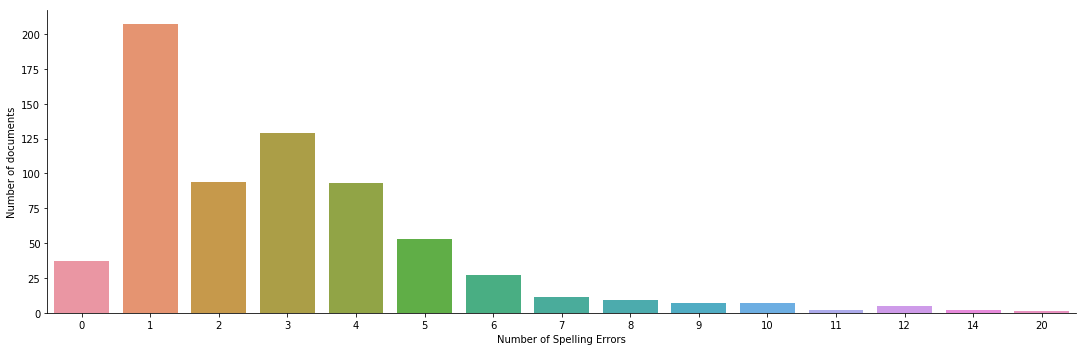

In [109]:
fig = sns.catplot(data=df,x="Req_merged_Spell",kind="count",aspect=3, color = None)
fig.set(xlabel='Number of Spelling Errors', ylabel='Number of documents')
plt.show()

__Observations__: Less than 25 documents had no spelling errors. 

In [116]:
# Labelling documents with no spelling errors as a good job descriptions
df['SpellErrorLabel'] = df['Req_merged_Spell'].apply(lambda x: 0 if x >1 else 1)

Part 2 :

* b. Tone: Tone of the job postings can be analyzed based on following two parameters:
    * i. Use of pronoun: Based on an [analysis], It is important in a job posting to directly speak to the reader. One of the indicators of this can be use of pronouns like “you” and “we.” 
    * ii. Sentiment Analysis: The general sentiment of the job postings should not be negative.
    
[analysis]: https://storage.googleapis.com/kaggle-forum-messageattachments/530963/13211/820tips20from2035020million20job20posts.pdf


* __Tone__:

___Use of Pronouns:___ In order to identify the parts of speech in a sentence, NLTK has been used. NLTK has the pos_tagger function that allows us to quickly tag parts of speech to a string.

In [117]:
def tokenize(col):
    try:
        grammar = r"""
        NP:
            # Pronouns
            {<PRP.*>}
        """
        chunker = nltk.RegexpParser(grammar)
        ne = []
        tokens=nltk.word_tokenize(col)
        fil_tokens=[]
        for token in tokens:
            if token != '':
                fil_tokens.append(token)
        chunk = chunker.parse(nltk.pos_tag(fil_tokens))
        for tree in chunk.subtrees(filter=lambda t: t.label() == 'NP'):
            ne.append(' '.join([child[0] for child in tree.leaves()]))
    except:
        print('This Section is Blank')
    return ne

df['REQ_Pronoun']=df['REQ_MERGED'].apply(lambda x: tokenize(str(x)))

In [118]:
pronouns=['you','your','yours','our','we','you\'ll']
def check_pronoun(ls):
    count=0
    for element in ls:
        element=element.lower()
        if element in pronouns:
            count=count+1
    return count

df['REQ_Pronoun_Count']=df['REQ_Pronoun'].apply(check_pronoun)

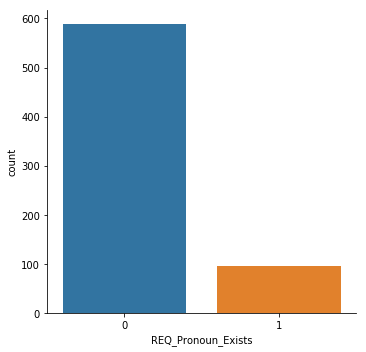

In [119]:
df['REQ_Pronoun_Exists']=(df.REQ_Pronoun_Count > 0 ) * 1
df['REQ_Pronoun_Exists'].value_counts()

sns.catplot(data=df,x='REQ_Pronoun_Exists',kind='count')

Comparing with the number of pronouns used in job description of companies like google and facebook:

In [120]:
JD1="Google's software engineers develop the next-generation technologies that change how billions of users connect, explore, and interact with information and one another. Our products need to handle information at massive scale, and extend well beyond web search. We're looking for engineers who bring fresh ideas from all areas, including information retrieval, distributed computing, large-scale system design, networking and data storage, security, artificial intelligence, natural language processing, UI design and mobile; the list goes on and is growing every day. As a software engineer, you will work on a specific project critical to Google’s needs with opportunities to switch teams and projects as you and our fast-paced business grow and evolve. We need our engineers to be versatile, display leadership qualities and be enthusiastic to take on new problems across the full-stack as we continue to push technology forward. With your technical expertise you will manage project priorities, deadlines, and deliverables. You will design, develop, test, deploy, maintain, and enhance software solutions. As a Software Engineer working on Android mobile applications, you’ll drive new innovations and build beautiful user experiences. You’ll work with mobile developers and resources to drive the next generation of apps at Google. You will develop applications primarily in Java and using the Android Software Development Kit (SDK). You might design and develop open-source Android applications that are part of the Android Open Source Project (AOSP) or closed-source Google applications that are the interface to Google services on Android. Google is and always will be an engineering company. We hire people with a broad set of technical skills who are ready to take on some of technology's greatest challenges and make an impact on millions, if not billions, of users. At Google, engineers not only revolutionize search, they routinely work on massive scalability and storage solutions, large-scale applications and entirely new platforms for developers around the world. From Google Ads to Chrome, Android to YouTube, Social to Local, Google engineers are changing the world one technological achievement after another."
JD2="The Strategic Vendor Management group within Corporate Engineering is responsible for managing vendors and contingent workforce for our business partners. You'll lead projects for the Vendor Operations Program Office team, setting priorities, leading cross-functional teams, ensuring success metrics are informing future efforts, and quickly fine tuning the program as needed. You'll use your technical and domain experience to manage a team of suppliers to deliver professional services to the business. You'll drive roadmap definition, help define the scope of those projects and partner across teams to address business pain points and ensure timely and cost-effective solution implementations. You have the ability and interest to work on a range of different types of projects and business processes and a background that demonstrates this ability. You have a solid technical foundation in program management and the talent and aptitude to learn new technologies and lead a variety of projects and teams across the organization. Behind everything our users see online is the architecture built by the Technical Infrastructure team to keep it running. From developing and maintaining our data centers to building the next generation of Google platforms, we make Google's product portfolio possible. We're proud to be our engineers' engineers and love voiding warranties by taking things apart so we can rebuild them. We're always on call to keep our networks up and running, ensuring our users have the best and fastest experience possible."
JD3="Facebook's mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we're building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. Whether we're creating new products or helping a small business expand its reach, people at Facebook are builders at heart. Our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. Together, we can help people build stronger communities — we're just getting started. Facebook is one of the world's largest content platforms and plays a critical role in helping people discover content, creators, and communities they love. We have everything from new interactive videos to exciting ways game streamers connect with their fans. Your role will be as a trusted advisor to a cross-functional organization launching great services, including white boarding a new feature, developing a creative video series, or assisting with content integrity issues that impact our users on a worldwide scale in a dynamic regulatory environment."
JD4="Facebook's mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we're building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. Whether we're creating new products or helping a small business expand its reach, people at Facebook are builders at heart. Our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. Together, we can help people build stronger communities — we're just getting started. We're looking for Data Scientists to work on our core and business products (ex. Instagram, Messaging, Growth, Engagement, Ads) to help shape the future of what we build at Facebook. You will enjoy working with one of the strongest data sets in the world, cutting edge technology, and the ability to see your insights turned into real products on a regular basis. The perfect candidate will have a background in a quantitative or technical field, will have experience working with large data sets, and will have some experience in data-driven decision making. You are focused on results, a self-starter, and have demonstrated success in using analytics to drive the understanding, growth, and success of a product. This position is based full-time in our Menlo Park, CA office."


In [121]:
#Dataframe of job descriptions and applying the pronoun function:
x=np.array([JD1,JD2,JD3,JD4])
id=np.array([1,2,3,4])
jd=pd.concat([pd.DataFrame({'id':id, 'desc':x}, columns=['id','desc'])])

In [122]:
jd['JD_Pronoun']=jd['desc'].apply(tokenize)
jd['JD_Pronoun_Count']=jd['JD_Pronoun'].apply(check_pronoun)
jd['JD_Pronoun']=jd['desc'].apply(tokenize)
jd[['JD_Pronoun_Count','JD_Pronoun']]

,JD_Pronoun_Count,JD_Pronoun
0,16,"[Our, We, you, you, our, We, our, we, your, yo..."
1,16,"[our, You, You, your, You, You, You, our, it, ..."
2,9,"[our, we, them, them, we, its, Our, we, we, th..."
3,13,"[our, we, them, them, we, its, Our, we, we, We..."


__Observations__: 

1. Approximately 84% documents do not use direct pronouns
2. The average number of direct pronouns used in the postings is ~0.8 which is way less as compared to the average number used in postings by companies like google. 

___Sentiment Analysis:___ Using nltk sentiment analyzer to identify the overall sentiment of the job posting

In [124]:
sid = SentimentIntensityAnalyzer()

In [134]:
def sentiment_analyzer(bulletins):
    my_dict = {}
    all_files = []
    for i in range(len(bulletins)):
        with open(path+bulletins[i],encoding="ISO-8859-1") as f:
            lines = f.readlines()
            idx = 0
            while len(lines[idx].rstrip(' \n\r\t')) == 0:
                    idx = idx + 1
            key = lines[idx].rstrip('\r\n\t')
    
        with open(path+bulletins[i],encoding="ISO-8859-1") as f:
            data="".join(line.rstrip() for line in f)
            sentiment_scores = sid.polarity_scores(data)
            my_dict[key]= [sentiment_scores]
    
    a = my_dict
    all_files.append(a)    
    
    df = pd.DataFrame(a).T.reset_index()
    return df

In [135]:
df_doc_scores = sentiment_analyzer(bulletins)
df_doc_scores.columns = ['TITLE','Sentiment_scores']
df_doc_scores[['Neg','Neutral','Positive','Compound']] = df_doc_scores.Sentiment_scores.apply(pd.Series)
df_doc_scores.drop(columns='Sentiment_scores',axis=1,inplace=True)

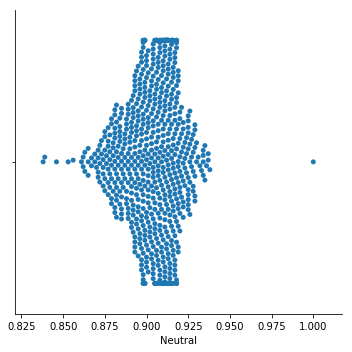

In [137]:
sns.catplot(data=df_doc_scores,x='Neutral',kind = 'swarm')

__Observation__: The overall sentiment of the posting seems to be neutral

Part 2 :

* b. Content: Content of the job postings can be analyzed based on following two parameters:
    * i. Similarity:  It is necessary to avoid duplication of the information and be precise about the requirements. 
    * ii. Readability: “Readability” is a metric of how easy it is to comprehend text. Readability can be measured using multiple scores including Gunning-Fog Index, Flesch Kincaid score and Dale Chall index. More info : [here]
    
[here]: https://medium.com/@uistephen/what-is-readability-and-why-does-it-matter-7773d018e4b9

* __Tone__:

___Similarity:___ Requirements, application process and duties are three important sections of a job posting. However, it is also important to avoid duplication in the content. Cosine similarity has been used to check for the similarity level between different sections. cosine similarity measures the cosine of the angle between two vectors projected in a multi-dimensional space.

In [139]:
df['REQUIREMENTS']=df['REQUIREMENTS'].apply(' '.join).str.rstrip(', ').str.lstrip(', ').str.lower()
df['PROCESS NOTES']=df['PROCESS NOTES'].apply(' '.join).str.rstrip(', ').str.lstrip(', ').str.lower()
df['DUTIES']=df['DUTIES'].apply(' '.join).str.rstrip(', ').str.lstrip(', ').str.lower()

In [140]:
# Remove punc
import string
main=['REQUIREMENTS','PROCESS NOTES','DUTIES']

def removePuncStr(s):
    for c in string.punctuation:
        #print (s)
        s = s.replace(c," ")
    return s

def punc(a,df):
    punc1=[]
    for index, row in df.iterrows():
            punc1.append(removePuncStr(row[str(a)]))
    df[a]=punc1

punc("REQUIREMENTS",df)
punc("PROCESS NOTES",df)
punc('DUTIES',df)

In [141]:
### Remove stop works
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def stopText(text_array):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text_array)
    h2 = ''
    for w in words:
        if w not in stop_words:
                h2 = h2 + ' ' + w
   
    return h2

def stopp(a,df):
    punc1=[]
    for index, row in df.iterrows():
            punc1.append(stopText(row[str(a)]))
    df[a]=punc1
      
stopp("REQUIREMENTS",df)
stopp("PROCESS NOTES",df)
stopp("DUTIES",df)

In [142]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def stemText(text_array):
    stemmed_text = []
    words = word_tokenize(text_array)
    h2 = ''
    for w in words:
            h2 = h2 + ' ' + PorterStemmer().stem(w)
            
   
    return h2

def stemm(a,df):
    punc1=[]
    for index, row in df.iterrows():
            punc1.append(stemText(row[str(a)]))
    df[a]=punc1

stemm("REQUIREMENTS",df)
stemm("PROCESS NOTES",df)
stemm("DUTIES",df)

In [143]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
                         intersection = set(vec1.keys()) & set(vec2.keys())
                         numerator = sum([vec1[x] * vec2[x] for x in intersection])

                         sum1 = sum([vec1[x]**2 for x in vec1.keys()])
                         sum2 = sum([vec2[x]**2 for x in vec2.keys()])
                         denominator = math.sqrt(sum1) * math.sqrt(sum2)

                         if not denominator:
                            return 0.0
                         else:
                            return float(numerator) / denominator

def text_to_vector(text):
             words = WORD.findall(text)
             return Counter(words)

def cosinee(a,b,df):
    cos=[]
    for index, row in df.iterrows():
        text1 = row[str(a)]
        text2 =row[str(b)]
        #print (text1)

        vector1 = text_to_vector(text1)
        vector2 = text_to_vector(text2)

        cosine = get_cosine(vector1, vector2)

        cos.append(cosine)
    df[a+'_'+b+'_COS']=cos

In [144]:
cosinee('REQUIREMENTS','PROCESS NOTES',df)
cosinee('REQUIREMENTS','DUTIES',df)
cosinee('PROCESS NOTES','DUTIES',df)

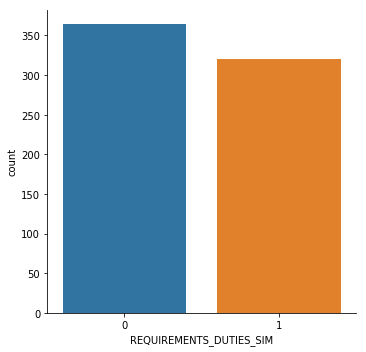

In [145]:
df['REQUIREMENTS_DUTIES_SIM']=(df['REQUIREMENTS_DUTIES_COS']<=0.25)*1
sns.catplot(data=df,x='REQUIREMENTS_DUTIES_SIM',kind = 'count')

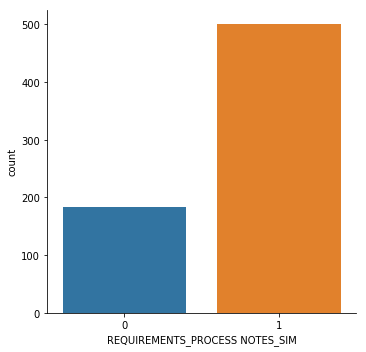

In [146]:
df['REQUIREMENTS_PROCESS NOTES_SIM']=(df['REQUIREMENTS_PROCESS NOTES_COS']<=0.25)*1
sns.catplot(data=df,x='REQUIREMENTS_PROCESS NOTES_SIM',kind = 'count')

__Observations__: Considering the threshold as 0.25 i.e. a similarity of greater than 0.25 indicates high amount of replication. Therefore 73% of these sections are very similar. Hence duplicated information is present in these descriptions.


___Readability:___ As explained earlier, readability indicates the comprehensibility of a posting. Scores for readability of the entire document and important sections have been computed. We use following three metrices:
1. Flesch Kincaid Score: The Flesch Reading Ease Score and the Flesch-Kincaid Grade Level also use counts of words, syllables, and sentences.[More Info] The Flesch Reading Ease Score is defined as

$$
206.835−1.015 \cdot \frac{\#words}{\#sentences} − 84.6 \cdot \frac{\#syllables}{\#words}
$$ 

With a range of 90-100 easily accessible by a 11-year old, 60-70 being easy to understand for 13-15 year olds, and 0-30 for university graduates.

2. Gunning Fog: Gunning (1952) developed the Fog index. The index estimates the years of formal education needed to understand text on a first reading. A fog index of 12 requires the reading level of a U.S. high school senior (around 18 years old). The index is based on the idea that poor readability is associated with longer sentences and complex words. Complex words are those that have more than two syllables. The formula for the Fog index is

$$
0.4 \left[\frac{\#words}{\#sentences} + 100 \cdot \frac{\#complex words}{\#words} \right]
$$
 
3. Dale Chall: DC index is based on a list of 3000 words that groups of fourth-grade American students could reliably understand. It considers any word that is not on that list to be difficult. [Info]

[More info]: http://en.wikipedia.org/wiki/Flesch-Kincaid_readability_tests
[Info]: https://en.wikipedia.org/wiki/Dale–Chall_readability_formula

In [147]:
def get_scores_test1(bulletins):
    my_dict = {}
    all_files = []
    for i in range(len(bulletins)):
        with open(path+bulletins[i],encoding="ISO-8859-1") as f:
            lines = f.readlines()
            idx = 0
            while len(lines[idx].rstrip(' \n\r\t')) == 0:
                    idx = idx + 1
            key = lines[idx].rstrip('\r\n\t')
            
        with open(path+bulletins[i],encoding="ISO-8859-1") as f:
            data="".join(line.rstrip() for line in f)
            sentiment_scores = sid.polarity_scores(data)
            r = Readability(data)
            fk = r.flesch_kincaid()
            fr = r.flesch()
            dc = r.dale_chall()
            ari = r.ari()
            gf = r.gunning_fog()
            my_dict[key]= [sentiment_scores,fk.grade_level,fr.score,fr.ease,
                                    dc.grade_levels,ari.grade_levels,gf.grade_level]
    a = my_dict
    all_files.append(a)

    df = pd.DataFrame(a).T.reset_index()
    return df

In [148]:
df_doc_scores = get_scores_test1(bulletins)

In [149]:
df_doc_scores.columns = ['TITLE','Sentiment_scores', 'FK_GLevel','FE_score','FE_ease','DC_GLevel','ARI_GLevel',\
               'GF_GLevel']

df_doc_scores[['Neg','Neutral','Positive','Compound']] = df_doc_scores.Sentiment_scores.apply(pd.Series)
df_doc_scores.drop(columns='Sentiment_scores',axis=1,inplace=True)

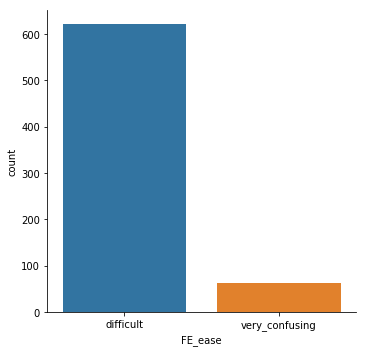

In [155]:
df_doc_scores.FE_ease.value_counts()
sns.catplot(data=df_doc_scores,x='FE_ease',kind = 'count')

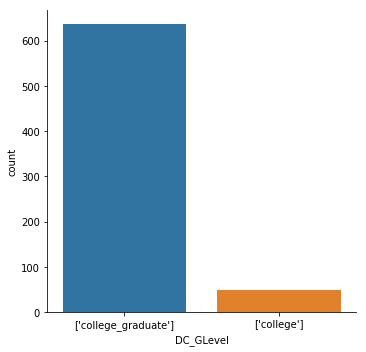

In [158]:
df_doc_scores.DC_GLevel.value_counts()
df_doc_scores['GF_GLevel'] = df_doc_scores['GF_GLevel'].astype(str)
df_doc_scores['DC_GLevel'] = df_doc_scores['DC_GLevel'].astype(str)
sns.catplot(data=df_doc_scores,x='DC_GLevel',kind = 'count')

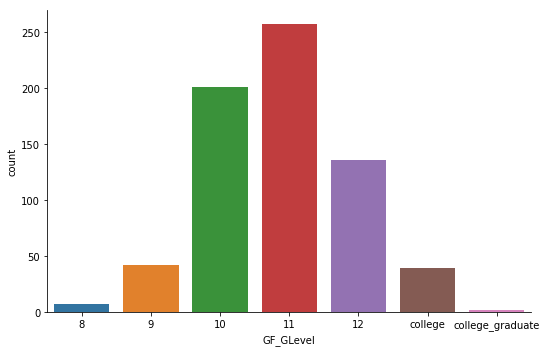

In [159]:
sns.catplot(data=df_doc_scores,x='GF_GLevel',kind = 'count',aspect=1.5,order=['8','9','10','11','12','college','college_graduate',])

__Observations__: 
1. Flesch Kincaid and and Dale Chall indicate that approximately 92% of the JD are difficult to understand.
2. Gunning Fog has established similar findings indicating more than 90% of JD require a grade level of high school graduate.

Section wise readability:

In [152]:
def readability_scores(stringed):
    flesch_score=0
    flesch_grade=0
    automated_readability=0
    dale_chall=0
    gunning_fog=0
    flesch_score=textstat.flesch_reading_ease(stringed)
    flesch_grade=textstat.flesch_kincaid_grade(stringed)
    automated_readability=textstat.automated_readability_index(stringed)
    dale_chall=textstat.dale_chall_readability_score(stringed)
    gunning_fog=textstat.gunning_fog(stringed)
    return [flesch_score,flesch_grade,automated_readability,dale_chall,gunning_fog]

In [160]:
df['REQ_MERGED_SCORES']=df.REQ_MERGED.apply(lambda x: readability_scores(str(x)))
df[['flesch_score_reqm','flesch_grade_reqm','automated_readability_reqm','dale_chall_reqm','gunning_fog_reqm']] = \
pd.DataFrame(df.REQ_MERGED_SCORES.values.tolist(), index= df.index)

In [161]:
df['dale_chall_reqm_bm']=(df.dale_chall_reqm < 8) * 1 +\
((df.dale_chall_reqm >= 8) & (df.dale_chall_reqm <= 10)) * 0.5 + (df.dale_chall_reqm >10) * 0

df['dale_chall_reqm_bm'].value_counts()

df['dale_chall_reqm_bm_label']=\
df['dale_chall_reqm_bm'].apply(lambda x: 'Easy' if x==1 else ('Moderate' if x==0.5 else 'Difficult'))

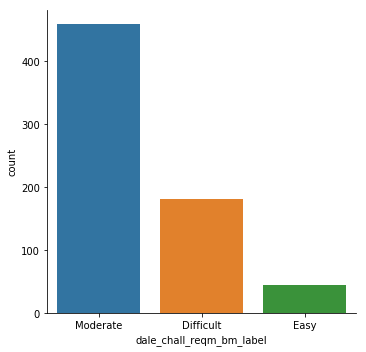

In [162]:
sns.catplot(data=df,x='dale_chall_reqm_bm_label',kind='count')

LABELLING : Threshold - higher than 15th grade is bad , 10th to 15th grade Moderate 

__Observation__: ~26% of Requirement & are difficult to read based on Dale Chall Readabilty Score 


Merging and computing scores:

Combining the dataframe to create a master dataframe that combines feature computed at document level and features created using the dataframe

In [166]:
df_merged = pd.merge(df,df_doc_scores,on = "TITLE", how= 'left')
df_merged = pd.merge(df_merged,df_doc_counts,on = "TITLE", how= 'left')

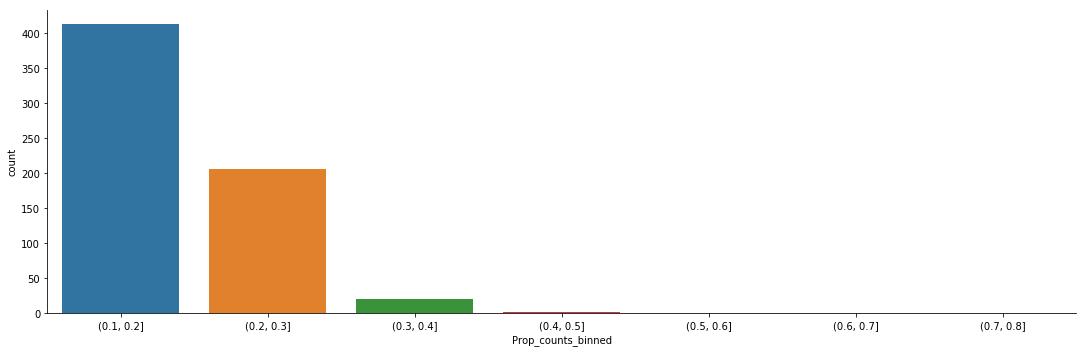

In [168]:
df_merged['Prop_counts'] = (df_merged['REQ_MERGED_WORDCOUNT'] / df_merged['WORD_COUNT'])
df_merged_1=df_merged.copy()
df_merged_1['Prop_counts_binned'] = pd.cut(df_merged_1['Prop_counts'],bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
sns.catplot(data=df_merged_1,x="Prop_counts_binned",kind="count",aspect=3)

df_merged['Prop_counts_labels'] = (df_merged['Prop_counts'] > 0.25) * 1

Creating a score for each of the posting. The score is created using the labels of the features created. It ranges from 0 - 12

In [183]:
df_merged['SCORE'] = df_merged['REQ_EXP_YEARS'] + df_merged['Annual_Salary_Present']  + df_merged['FULL/PART'] + df_merged['SCHOOL_PRESENT'] + df_merged['dale_chall_reqm_bm'] + df_merged['REQ_Pronoun_Exists'] + df_merged['SpellErrorLabel'] + df_merged['DocWordCountLabel'] + df_merged['Prop_counts_labels'] + df_merged['REQUIREMENTS_DUTIES_SIM'] + df_merged['REQUIREMENTS_PROCESS NOTES_SIM']

In [184]:
df_merged.SCORE.value_counts()

4.5    169
3.5    145
4.0     85
5.5     73
5.0     67
2.5     58
3.0     51
2.0     11
1.5     11
6.0      9
6.5      3
7.0      1
1.0      1
Name: SCORE, dtype: int64

Based on the score, the postings can now be grouped as good vs need improvement. The highest score any job posting has received is 6. So an indicator is created considering all postings with score >= 7 as good ones amongst the pool and others as need more improvement

In [189]:
df_merged['Better_JD'] = (df_merged.LABELS >= 6.0) * 1 

In [190]:
df_merged['Better_JD'].value_counts()

0    671
1     13
Name: Better_JD, dtype: int64

__Conclusion and Recommendations__:

Based on the preliminary analysis, following recommendations can be provided to the city of LA which can be the first steps to improve the job postings:

1. Increase the readability based on the target applicants (Job-type, Education level)
2. Avoid duplication of information
3. Speak directly to candidates
4. Increase the availability of a job posting (in terms of duration)
5. Avoid spelling errors
6. Increase the proportion of highly relevant sections (Requirements, Selection Process)
7. Reduce the length of job description (< than 600-700)
8. Separate sections for important information/requirement (education)

__Extension:__

* 1. Few ways in which the preliminary analysis can be extended:
    * a. To check using pronouns if there is gender bias in the postings which is discouraging candidates to apply 
    * b. Look for most frequent words (probable methods: Word 2 Vec and TSNE) used in the postings, specifically     in the requirements/duties section and compare it with ones used by some other companies
    * c. Modelling to find most dominant/ commmon topic if any using LDA 
    * d. Building an algorithm to score the job descriptions so that whenever a new posting is posted, it can   first be validated, scored and improved if required.
